First we will make a jupyter notebook and try to obtain best result. After that we will split the notebook into different python scripts for deployment if needed.

# Getting the data ready

In [108]:
import os
import zipfile
import tarfile
from pathlib import Path
import requests

### Setting where to download the data

In [5]:
data_path = Path('data')
image_path = data_path / "food-101"

In [ ]:
if image_path.exists():
    print(f'{image_path} Already exists!!!')
else:
    image_path.mkdir(parents=True, exist_ok = True)

    with open(data_path/ 'food-101.tar.gz','wb') as f:
        print("Downloading food101 dataset. . . . ")
        response = requests.get("http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz")
        f.write(response.content)
    
    with tarfile.open(data_path / 'food-101.tar.gz', 'r:gz') as tar:
        tar.extractall(path=image_path)
    
    os.remove(data_path/'food-101.tar.gz')
    print("Extraction complete.")

In [ ]:
# Visualize the structure of the directory

def print_directory_tree(path, indent=""):
    """
        Print a tree-like structure of the directory contents.

        This function recursively traverses the directory specified by the `path` 
        argument and prints its structure in a visually appealing format. 
        Only directories are shown; files are omitted.

        Parameters:
        path (str): The path to the directory to be printed.
        indent (str): The string used for indentation to create the tree structure. 
                      It is used internally during recursion and should not be 
                      modified when calling the function.
        result (str): A string to accumulate the directory structure for testing.

        Returns:
        str: A formatted string representing the directory structure.
     """
    # List all items in the given directory
    items = os.listdir(path)
    # Sort the items for a more organized output
    items.sort()
    
    for index, item in enumerate(items):
        # Create the full path
        full_path = os.path.join(path, item)
        
        # Check if the item is a directory
        if os.path.isdir(full_path):
            # Print the directory name
            print(f"{indent}├── {item}/")
            # Recursively print the contents of the directory
            print_directory_tree(full_path, indent + "│   ")

# Usage
directory_path = "data"  
print_directory_tree(directory_path)

├── food-101/
│   ├── Test/
│   │   ├── apple_pie/
│   │   ├── baby_back_ribs/
│   │   ├── baklava/
│   │   ├── beef_carpaccio/
│   │   ├── beef_tartare/
│   │   ├── beet_salad/
│   │   ├── beignets/
│   │   ├── bibimbap/
│   │   ├── bread_pudding/
│   │   ├── breakfast_burrito/
│   │   ├── bruschetta/
│   │   ├── caesar_salad/
│   │   ├── cannoli/
│   │   ├── caprese_salad/
│   │   ├── carrot_cake/
│   │   ├── ceviche/
│   │   ├── cheese_plate/
│   │   ├── cheesecake/
│   │   ├── chicken_curry/
│   │   ├── chicken_quesadilla/
│   │   ├── chicken_wings/
│   │   ├── chocolate_cake/
│   │   ├── chocolate_mousse/
│   │   ├── churros/
│   │   ├── clam_chowder/
│   │   ├── club_sandwich/
│   │   ├── crab_cakes/
│   │   ├── creme_brulee/
│   │   ├── croque_madame/
│   │   ├── cup_cakes/
│   │   ├── deviled_eggs/
│   │   ├── donuts/
│   │   ├── dumplings/
│   │   ├── edamame/
│   │   ├── eggs_benedict/
│   │   ├── escargots/
│   │   ├── falafel/
│   │   ├── filet_mignon/
│   │   ├── fish_and_

In [ ]:
new_image_path = image_path /'images' # the actual place where the imanges are loacted
print(image_path,new_image_path)

data/food-101 data/food-101/images


# Creating Custom DataLoader



In [11]:
from typing import Tuple, Dict, List

In [12]:
class_names_found = [clx.replace('_',' ') for clx in sorted(os.listdir(new_image_path))]

In [13]:
classes = class_names_found
class_to_idx  = {name:i for i,name in enumerate(classes)}

### Moving to Train and Test Directory

In [ ]:
import os
import shutil
import random

# Set paths
source_dir = new_image_path
train_dir = image_path/ "Train"  
test_dir = image_path/ "Test" \

# Set split ratio
split_ratio = 0.7  # 70% for train, 30% for test

# Function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Function to split files into Train and Test
def split_data(source, train, test, ratio):
    for category in os.listdir(source):  # Loop through all categories
        category_path = os.path.join(source, category)
        
        if os.path.isdir(category_path):
            # Create directories in Train and Test folders
            create_dir(os.path.join(train, category))
            create_dir(os.path.join(test, category))
            
            # Get all image files from the category
            images = os.listdir(category_path)    

            # Split images into Train and Test
            split_index = int(len(images) * ratio)
            train_images = images[:split_index]
            test_images = images[split_index:]
            
            # Move images to Train and Test directories
            for img in train_images:
                shutil.copy(os.path.join(category_path, img), os.path.join(train, category, img))
            for img in test_images:
                shutil.copy(os.path.join(category_path, img), os.path.join(test, category, img))

create_dir(train_dir)
create_dir(test_dir)
split_data(source_dir, train_dir, test_dir, split_ratio)

print("Data has been split into Train and Test successfully!")

Data has been split into Train and Test successfully!


### Setting Train and Test path after moving images to respective directory

In [14]:
train_path= image_path / "Train"
test_path = image_path / "Test"

### Visualizing the image from Train and Test Path

Random image path: data/food-101/Train/garlic_bread/1947504.jpg
Image class: garlic bread
Image height: 512
Image width: 512


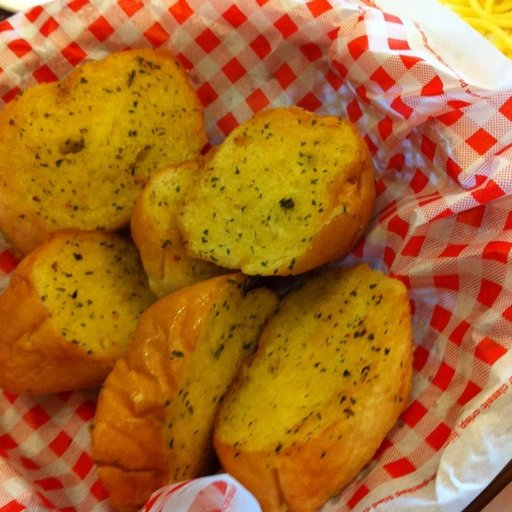

In [ ]:
import random
from PIL import Image
all_images = list(train_path.glob("*/*.jpg"))

random_image_path = random.choice(all_images)
image_class = random_image_path.parent.stem.replace('_'," ")   # stem will select the last directory of the path and path.parent will return image dir path
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img


### Transforming the data

In [45]:
#creating manual transforms Later we will use auto transforms as per the pretrained model used.
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

manual_transform =  transforms.Compose(
    [
        transforms.Resize(size=(224,224)),
        transforms.ToTensor()
    ]
)

#### Visualizing the image before and after transformation

In [69]:
import matplotlib.pyplot as plt

def plot_before_after(image_paths, transforms, n=3):

    random_image = random.sample(image_paths, k=n)

    for img in random_image:
        with Image.open(img) as f:
            fig, ax = plt.subplots(1,2)
            #before plot
            ax[0].imshow(f)
            ax[0].set_title(f"Orginal Image \n Size: {f.size}")
            ax[0].axis(False)

            #after plot
            trans_image = transforms(f).permute(1,2,0)  # change from C,H,W to H,W,C
            ax[1].imshow(trans_image)
            ax[1].set_title(f"Transformed Image \n Size: {trans_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {img.parent.stem}",fontsize= 16)

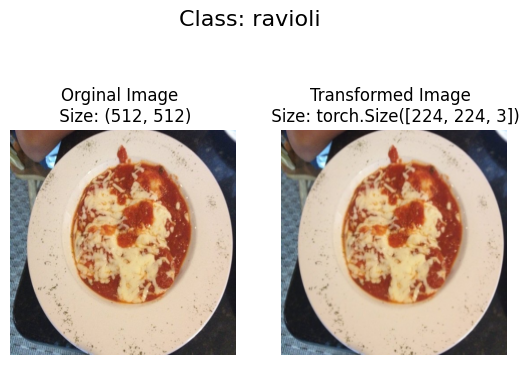

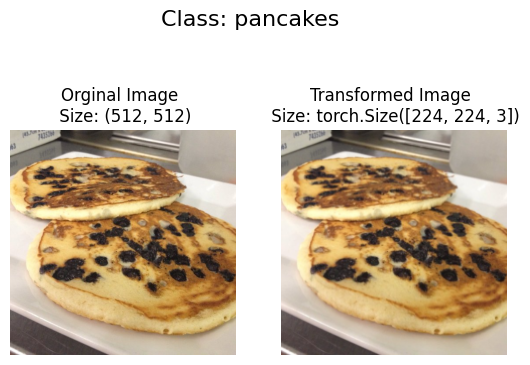

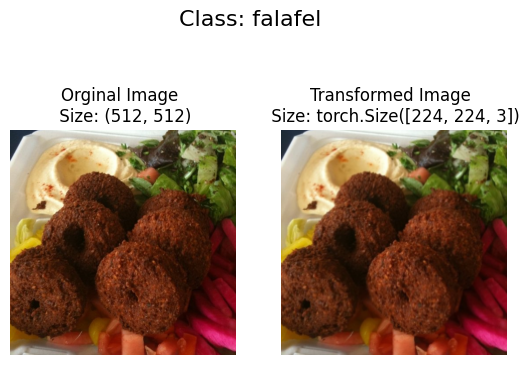

In [70]:
plot_before_after(image_paths=all_images, transforms=manual_transform, n=3)

## Using ImageFolder to convert into Dataset

In [73]:
train_data = datasets.ImageFolder(root = train_path,
                                  transform = manual_transform,
                                  target_transform = None
                                  )

In [74]:
train_data

Dataset ImageFolder
    Number of datapoints: 70700
    Root location: data/food-101/Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

### Turning that dataset into DataLoader

In [76]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = 8,
                              num_workers = 6,
                              shuffle = True

)

In [79]:
img,label= next(iter(train_dataloader))

#### checking label from the dataloader

In [ ]:
mapped_keys = []
for key, value in class_to_idx.items():
    if value in label:
        print(value)
        mapped_keys.append(key)
print(mapped_keys)

In [ ]:
[k for k,v in class_to_idx.items() if v in label]  #this and above one is more costly

['carrot cake',
 'macarons',
 'omelette',
 'ramen',
 'spring rolls',
 'sushi',
 'tiramisu',
 'tuna tartare']

In [105]:
reverse={v:k for k,v in class_to_idx.items()} #more efficient
[reverse[int(value)] for value in label]

['macarons',
 'sushi',
 'carrot cake',
 'omelette',
 'tuna tartare',
 'ramen',
 'tiramisu',
 'spring rolls']

# Creating Custom Dataset

In [115]:
from torch.utils.data import Dataset
import pathlib

class CustomDS(Dataset):

    def __init__(self, target_dir, transform):
        #get all image path inside target_dir
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

        self.transform = transform

        self.classes = [clx.replace('_',' ') for clx in sorted(os.listdir(target_dir))]
        self.class_to_idx = {name:i for i, name in enumerate(self.classes)}
        print(self.class_to_idx)
    
    def load_image(self, index):
        image_path = self.paths[index]

        return Image.open(image_path)

    
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index):
        img = sef.load_image(index)
        class_name = self.paths[index].parent.stem
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx

        else:
            return img,class_idx

In [ ]:
test = CustomDS(target_dir)